<a href="https://colab.research.google.com/github/manasimathkar/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
os.environ['KAGGLE_USERNAME'] ='manasimathkar'
os.environ['KAGGLE_KEY']='72479b9adf0212db41a06cca43009654'

In [4]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 97% 201M/207M [00:02<00:00, 114MB/s]
100% 207M/207M [00:02<00:00, 93.7MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [6]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir, 'Train')
test_dir = os.path.join(main_dir, 'Test')
valid_dir = os.path.join(main_dir, 'Validation')

train_mask_dir = os.path.join(train_dir, 'Mask')
train_nomask_dir = os.path.join(train_dir, 'Non Mask')

In [8]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0547.jpg', '1548.jpg', '0545.jpg', '1109.jpg', '1135.jpg', '1280.jpg', '0592.jpg', '0743.jpg', '0198.jpg', '1574.jpg']
['11.jpg', '194.jpg', '160.jpg', '153.jpg', '63.jpg', '97.jpg', '155.jpg', '29.jpg', '288.jpg', '31.jpg']


['/content/New Masks Dataset/Train/Mask/0547.jpg', '/content/New Masks Dataset/Train/Mask/1548.jpg', '/content/New Masks Dataset/Train/Mask/0545.jpg', '/content/New Masks Dataset/Train/Mask/1109.jpg', '/content/New Masks Dataset/Train/Mask/1135.jpg', '/content/New Masks Dataset/Train/Mask/1280.jpg', '/content/New Masks Dataset/Train/Mask/0592.jpg', '/content/New Masks Dataset/Train/Mask/0743.jpg']
['/content/New Masks Dataset/Train/Non Mask/11.jpg', '/content/New Masks Dataset/Train/Non Mask/194.jpg', '/content/New Masks Dataset/Train/Non Mask/160.jpg', '/content/New Masks Dataset/Train/Non Mask/153.jpg', '/content/New Masks Dataset/Train/Non Mask/63.jpg', '/content/New Masks Dataset/Train/Non Mask/97.jpg', '/content/New Masks Dataset/Train/Non Mask/155.jpg', '/content/New Masks Dataset/Train/Non Mask/29.jpg']


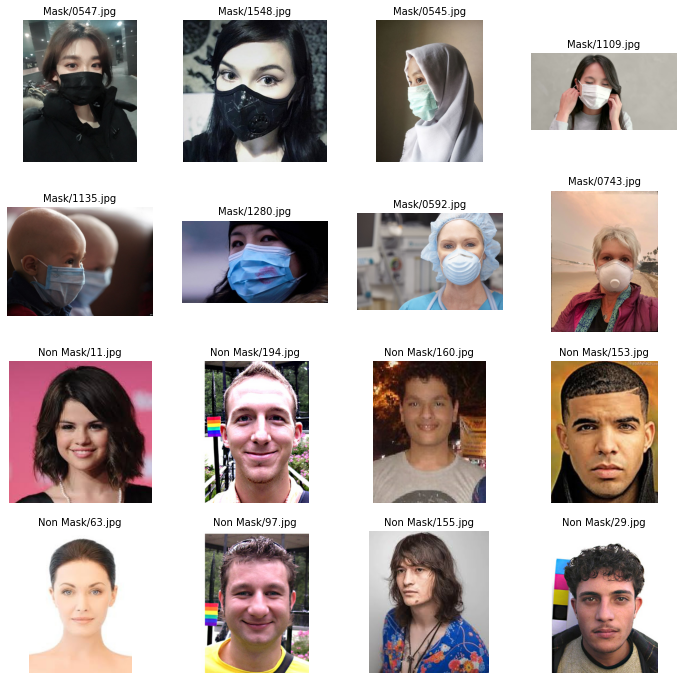

In [9]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [11]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [12]:
train_generator.image_shape

(150, 150, 3)

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [14]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 24s 724ms/step - loss: 3.4016 - accuracy: 0.5083 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/30
19/19 [==============================] - 13s 689ms/step - loss: 0.6820 - accuracy: 0.5150 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 13s 697ms/step - loss: 0.6406 - accuracy: 0.6917 - val_loss: 0.6249 - val_accuracy: 0.6111
Epoch 4/30
19/19 [==============================] - 13s 699ms/step - loss: 0.5574 - accuracy: 0.7233 - val_loss: 0.5918 - val_accuracy: 0.8007
Epoch 5/30
19/19 [==============================] - 13s 714ms/step - loss: 0.3959 - accuracy: 0.8367 - val_loss: 0.3963 - val_accuracy: 0.8791
Epoch 6/30
19/19 [==============================] - 13s 708ms/step - loss: 0.3263 - accuracy: 0.8833 - val_loss: 0.3881 - val_accuracy: 0.9052
Epoch 7/30
19/19 [==============================] - 13s 690ms/step - loss: 0.2911 - accuracy: 0.9000 - val_loss: 0.3244 - val_accuracy: 0.8954

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

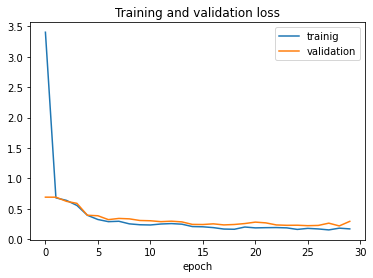

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

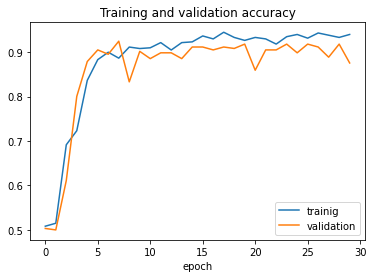

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [19]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 271ms/step - loss: 0.2603 - accuracy: 0.8800
test acc :0.8799999952316284 test loss:0.26034441590309143


In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving Selena-Gomez.jpeg to Selena-Gomez.jpeg
Selena-Gomez.jpeg
nomask
